# 1. 함수 매핑

## 1) 개별 원소에 함수 매핑

### (1) 시리즈 원소에 함수 매핑   
### 시리즈객체.apply(매핑함수)

In [1]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
df['ten'] = 10

df.head()

,age,fare,ten
0,22.0,7.2500,10
1,38.0,71.2833,10
2,26.0,7.9250,10
3,35.0,53.1000,10
4,35.0,8.0500,10


In [2]:
# 사용자 함수 정의
def add_10(n):   # 10을 더하는 함수
    return n + 10

def add_two_obj(a, b):    # 두 객체의 합
    return a + b

In [3]:
add_10(10)

20

In [4]:
add_two_obj(10, 10)

20

In [5]:
# 시리즈 객체에 적용
sr1 = df['age'].apply(add_10)               # n = df['age']의 모든 원소
sr1.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [6]:
# 시리즈 객체와 숫자에 적용 : 2개의 인수(시리즈 + 숫자)
sr2 = df['age'].apply(add_two_obj, b=10)    # a=df['age']의 모든 원소, b=10
sr2.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [7]:
# 람다 함수 활용: 시리즈 객체에 적용
sr3 = df['age'].apply(lambda x: add_10(x))  # x=df['age']
sr3.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

### (2) 데이터프레임 원소에 함수 매핑 
### 데이터프레임객체.applymap(매핑함수)

In [8]:
# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]

df.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [9]:
# 사용자 함수 정의
def add_10(n):   # 10을 더하는 함수
    return n + 10

In [10]:
# 데이터프레임에 applymap()으로 add_10() 함수를 매핑 적용
df_map = df.applymap(add_10)   
df_map.head()

,age,fare
0,32.0,17.2500
1,48.0,81.2833
2,36.0,17.9250
3,45.0,63.1000
4,45.0,18.0500


## 2) 시리즈 객체에 함수 매핑

### (1) 데이터프레임의 각 열에 함수 매핑
### 데이터프레임객체.apply(매핑함수, axis = 0)

In [11]:
# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]

df.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [12]:
# 사용자 함수 정의
def missing_value(series):    # 시리즈를 인수로 전달
    return series.isnull()    # 결측치 여부를 불린 시리즈로 반환

In [13]:
# 데이터프레임의 각 열을 인수로 전달하면 데이터프레임을 반환
result = df.apply(missing_value, axis=0)  
result.head()

,age,fare
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [14]:
type(result)

pandas.core.frame.DataFrame

In [15]:
df

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [16]:
# 사용자 함수 정의
def min_max(x):    # 최대값 - 최소값
    return x.max() - x.min()
    
# 데이터프레임의 각 열을 인수로 전달하면 시리즈를 반환
result = df.apply(min_max)   #기본값 axis=0 
result

age      79.5800
fare    512.3292
dtype: float64

### (2) 데이터프레임의 각 행에 함수 매핑
### 데이터프레임객체.apply(매핑함수, axis = 1)

In [17]:
# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
df['ten'] = 10
df.head()

,age,fare,ten
0,22.0,7.2500,10
1,38.0,71.2833,10
2,26.0,7.9250,10
3,35.0,53.1000,10
4,35.0,8.0500,10


In [18]:
# 사용자 함수 정의
def add_two_obj(a, b):    # 두 객체의 합
    return a + b

In [20]:
# 데이터프레임의 2개 열을 선택하여 적용
# x=df, a=df['age'], b=df['ten']
df['add'] = df.apply(lambda x: add_two_obj(x['age'], x['ten']), axis=1)   
df.head()

,age,fare,ten,add
0,22.0,7.2500,10,32.0
1,38.0,71.2833,10,48.0
2,26.0,7.9250,10,36.0
3,35.0,53.1000,10,45.0
4,35.0,8.0500,10,45.0


## 3) 데이터프레임 객체에 함수 매핑

In [21]:
# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
df.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [22]:
# 각 열의 NaN 찾기 - 데이터프레임 전달하면 데이터프레임을 반환
def missing_value(x):    
    return x.isnull()    

# 각 열의 NaN 개수 반환 - 데이터프레임 전달하면 시리즈 반환
def missing_count(x):    # 
    return missing_value(x).sum()

# 데이터프레임의 총 NaN 개수 - 데이터프레임 전달하면 값을 반환
def totoal_number_missing(x):    
    return missing_count(x).sum()

In [23]:
# 데이터프레임에 pipe() 메소드로 함수 매핑
result_df = df.pipe(missing_value)
result_df.head()

,age,fare
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [24]:
type(result_df)

pandas.core.frame.DataFrame

In [26]:
result_series = df.pipe(missing_count)
result_series

age     177
fare      0
dtype: int64

In [27]:
type(result_series)

pandas.core.series.Series

In [28]:
result_value = df.pipe(totoal_number_missing)   
result_value

177

In [29]:
type(result_value)

numpy.int64

# 2. 열 재구성

## 1) 열 순서 변경
## 데이터프레임객체[재구성한 열 이름의 리스트]

In [30]:
# titanic 데이터셋의 부분을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[0:4, 'survived':'age']
df

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [31]:
df.columns

Index(['survived', 'pclass', 'sex', 'age'], dtype='object')

In [32]:
df.columns.values

array(['survived', 'pclass', 'sex', 'age'], dtype=object)

In [33]:
# 열 이름의 리스트 만들기
columns = list(df.columns.values)   #기존 열 이름
columns

['survived', 'pclass', 'sex', 'age']

In [34]:
# 열 이름을 알파벳 순으로 정렬하기
columns_sorted = sorted(columns)    #알파벳 순으로 정렬
df_sorted = df[columns_sorted]
df_sorted

,age,pclass,sex,survived
0,22.0,3,male,0
1,38.0,1,female,1
2,26.0,3,female,1
3,35.0,1,female,1
4,35.0,3,male,0


In [35]:
# 열 이름을 기존 순서의 정반대 역순으로 정렬하기
columns_reversed = list(reversed(columns))  
df_reversed = df[columns_reversed]
df_reversed

,age,sex,pclass,survived
0,22.0,male,3,0
1,38.0,female,1,1
2,26.0,female,3,1
3,35.0,female,1,1
4,35.0,male,3,0


In [36]:
# 열 이름을 사용자가 정의한 임의의 순서로 재배치하기
columns_customed = ['pclass', 'sex', 'age', 'survived']  
df_customed = df[columns_customed]
df_customed

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


## 2) 열 분리

In [37]:
# 라이브러리 불러오기
import pandas as pd

# 데이터셋 가져오기
df = pd.read_excel('./주가데이터.xlsx', engine= 'openpyxl')
df

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039
5,2018-06-25,11150,150,11400,11450,11000,55519
6,2018-06-22,11300,100,11250,11450,10750,134805
7,2018-06-21,11200,350,11350,11750,11200,133002
8,2018-06-20,11550,250,11200,11600,10900,308596
9,2018-06-19,11300,700,11850,11950,11300,180656


In [38]:
# 연, 월, 일 데이터 분리하기
df['연월일'] = df['연월일'].astype('str')   # 문자열 메소드 사용을 자료형 변경
dates = df['연월일'].str.split('-')        # 문자열을 split() 메서드로 분리
dates

0     [2018, 07, 02]
1     [2018, 06, 29]
2     [2018, 06, 28]
3     [2018, 06, 27]
4     [2018, 06, 26]
5     [2018, 06, 25]
6     [2018, 06, 22]
7     [2018, 06, 21]
8     [2018, 06, 20]
9     [2018, 06, 19]
10    [2018, 06, 18]
11    [2018, 06, 15]
12    [2018, 06, 14]
13    [2018, 06, 12]
14    [2018, 06, 11]
15    [2018, 06, 08]
16    [2018, 06, 07]
17    [2018, 06, 05]
18    [2018, 06, 04]
19    [2018, 06, 01]
Name: 연월일, dtype: object

In [39]:
# 분리된 정보를 각각 새로운 열에 담아서 df에 추가하기
df['연'] = dates.str.get(0)     # dates 변수의 원소 리스트의 0번째 인덱스 값
df['월'] = dates.str.get(1)     # dates 변수의 원소 리스트의 1번째 인덱스 값 
df['일'] = dates.str.get(2)     # dates 변수의 원소 리스트의 2번째 인덱스 값
df

,연월일,당일종가,전일종가,시가,고가,저가,거래량,연,월,일
0,2018-07-02,10100,600,10850,10900,10000,137977,2018,07,02
1,2018-06-29,10700,300,10550,10900,9990,170253,2018,06,29
2,2018-06-28,10400,500,10900,10950,10150,155769,2018,06,28
3,2018-06-27,10900,100,10800,11050,10500,133548,2018,06,27
4,2018-06-26,10800,350,10900,11000,10700,63039,2018,06,26
5,2018-06-25,11150,150,11400,11450,11000,55519,2018,06,25
6,2018-06-22,11300,100,11250,11450,10750,134805,2018,06,22
7,2018-06-21,11200,350,11350,11750,11200,133002,2018,06,21
8,2018-06-20,11550,250,11200,11600,10900,308596,2018,06,20
9,2018-06-19,11300,700,11850,11950,11300,180656,2018,06,19


# 3. 필터링
#### 데이터프레임 데이터 중에서 특정 조건식을 만족하는 원소만 따로 추출하는 개념

## 1) 불린 인덱싱
### 데이터프레임객체[불린 시리즈]

In [40]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 로딩
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [42]:
# 나이가 10대(10~19세)인 승객만 따로 선택
mask1 = (titanic.age >= 10) & (titanic.age < 20)
df_teenage = titanic.loc[mask1, :]
df_teenage

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,1,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False
855,1,3,female,18.0,0,1,9.3500,S,Third,woman,False,NaN,Southampton,yes,False
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [43]:
# 나이가 10세 미만(0~9세)이고 여성인 승객만 따로 선택
mask2 = (titanic.age < 10) & (titanic.sex == 'female')
df_female_under10 = titanic.loc[mask2, :]
df_female_under10

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.00,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.00,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
147,0,3,female,9.00,2,2,34.3750,S,Third,child,False,NaN,Southampton,no,False
172,1,3,female,1.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False
184,1,3,female,4.00,0,2,22.0250,S,Third,child,False,NaN,Southampton,yes,False
205,0,3,female,2.00,0,1,10.4625,S,Third,child,False,G,Southampton,no,False
233,1,3,female,5.00,4,2,31.3875,S,Third,child,False,NaN,Southampton,yes,False


In [44]:
# 나이가 10세 미만(0~9세) 또는 60세 이상인 승객의 age, sex, alone 열만 선택
mask3 = (titanic.age < 10) | (titanic.age >= 60)
df_under10_morethan60 = titanic.loc[mask3, ['age', 'sex', 'alone']]
df_under10_morethan60

,age,sex,alone
7,2.00,male,False
10,4.00,female,False
16,2.00,male,False
24,8.00,female,False
33,66.00,male,True
...,...,...,...
831,0.83,male,False
850,4.00,male,False
851,74.00,male,True
852,9.00,female,False


## 2) isin() 메소드 활용
### df명['열이름'].isin(추출 값의 리스트)

In [45]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [46]:
# IPyhton 디스플레이 설정 변경 - 출력할 최대 열의 개수
pd.set_option('display.max_columns', 10)  

In [47]:
# 함께 탑승한 형제 또는 배우자의 수가 3, 4, 5인 승객만 따로 추출 - 불린 인덱싱
mask3 = titanic['sibsp'] == 3
mask4 = titanic['sibsp'] == 4
mask5 = titanic['sibsp'] == 5
df_boolean = titanic[mask3 | mask4 | mask5]

df_boolean

,survived,pclass,sex,age,sibsp,...,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,...,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,...,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,...,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,...,True,C,Southampton,no,False
50,0,3,male,7.0,4,...,False,NaN,Southampton,no,False
59,0,3,male,11.0,5,...,False,NaN,Southampton,no,False
63,0,3,male,4.0,3,...,False,NaN,Southampton,no,False
68,1,3,female,17.0,4,...,False,NaN,Southampton,yes,False
71,0,3,female,16.0,5,...,False,NaN,Southampton,no,False
85,1,3,female,33.0,3,...,False,NaN,Southampton,yes,False


In [48]:
# isin() 메서드 활용하여 동일한 조건으로 추출
isin_filter = titanic['sibsp'].isin([3, 4, 5])
df_isin = titanic[isin_filter]
df_isin

,survived,pclass,sex,age,sibsp,...,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,...,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,...,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,...,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,...,True,C,Southampton,no,False
50,0,3,male,7.0,4,...,False,NaN,Southampton,no,False
59,0,3,male,11.0,5,...,False,NaN,Southampton,no,False
63,0,3,male,4.0,3,...,False,NaN,Southampton,no,False
68,1,3,female,17.0,4,...,False,NaN,Southampton,yes,False
71,0,3,female,16.0,5,...,False,NaN,Southampton,no,False
85,1,3,female,33.0,3,...,False,NaN,Southampton,yes,False


# 4. 데이터프레임 합치기

## 1) 데이터프레임 연결  concat()
### join = 'outer' ; 합집합으로 연결 (default)
### join = 'inner' ; 교집합으로 연결
### ignore_index = True ; 기존 행 인덱스 무시하고 새로운 행 인덱스 생성

#### axis = 0 ; default

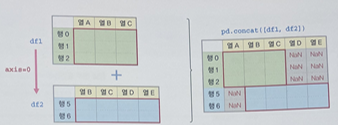

In [49]:
# 데이터프레임 만들기
df1 = pd.DataFrame({'a': ['a0', 'a1', 'a2', 'a3'],
                    'b': ['b0', 'b1', 'b2', 'b3'],
                    'c': ['c0', 'c1', 'c2', 'c3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3', 'b4', 'b5'],
                    'c': ['c2', 'c3', 'c4', 'c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']},
                    index=[2, 3, 4, 5])

In [50]:
df1

,a,b,c
0,a0,b0,c0
1,a1,b1,c1
2,a2,b2,c2
3,a3,b3,c3


In [51]:
df2

,a,b,c,d
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


In [52]:
# 2개의 데이터프레임을 위 아래 행 방향으로 이어 붙이듯 연결하기 
result1 = pd.concat([df1, df2])
result1

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


In [53]:
# ignore_index=True 옵션 설정하기 
result2 = pd.concat([df1, df2], ignore_index=True)
result2

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
4,a2,b2,c2,d2
5,a3,b3,c3,d3
6,a4,b4,c4,d4
7,a5,b5,c5,d5


#### axis = 1

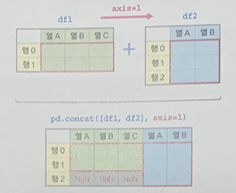

In [54]:
# 2개의 데이터프레임을 좌우 열 방향으로 이어 붙이듯 연결하기 
result3 = pd.concat([df1, df2], axis=1)
result3

,a,b,c,a,b,c,d
0,a0,b0,c0,NaN,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN,NaN
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3
4,NaN,NaN,NaN,a4,b4,c4,d4
5,NaN,NaN,NaN,a5,b5,c5,d5


In [55]:
# join='inner' 옵션 적용하기(교집합)
result3_in = pd.concat([df1, df2], axis=1, join='inner')
result3_in

,a,b,c,a,b,c,d
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3


### 데이터프레임-시리즈 연결하기
### 좌우 열 방향으로 연결하기 ; axis = 1  --> 데이터프레임이 됨
### - 데이터프레임에 열 추가하는 것과 같음
### - 시리즈의 이름이 데이터프레임의 열 이름으로 변환
### - 단, 데이터프레임의 행 인덱스와 시리즈의 인덱스가 동일해야 함
### - 공통 인덱스 없을 경우 NaN값으로 변환
### 위아래 행 방향으로 연결하기 ; axis = 0  --> 하나의 시리즈가 됨

In [56]:
# 시리즈 만들기
sr1 = pd.Series(['e0', 'e1', 'e2', 'e3'], name='e')
sr2 = pd.Series(['f0', 'f1', 'f2'], name='f', index=[3, 4, 5])
sr3 = pd.Series(['g0', 'g1', 'g2', 'g3'], name='g')

In [57]:
sr1

0    e0
1    e1
2    e2
3    e3
Name: e, dtype: object

In [58]:
sr2

3    f0
4    f1
5    f2
Name: f, dtype: object

In [59]:
sr3

0    g0
1    g1
2    g2
3    g3
Name: g, dtype: object

In [60]:
# df1과 sr1을 좌우 열 방향으로 연결하기
result4 = pd.concat([df1, sr1], axis=1)
result4

,a,b,c,e
0,a0,b0,c0,e0
1,a1,b1,c1,e1
2,a2,b2,c2,e2
3,a3,b3,c3,e3


In [61]:
# df2과 sr2을 좌우 열 방향으로 연결하기
result5 = pd.concat([df2, sr2], axis=1, sort=True)
result5

,a,b,c,d,f
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,f0
4,a4,b4,c4,d4,f1
5,a5,b5,c5,d5,f2


In [62]:
# sr1과 sr3을 좌우 열 방향으로 연결하기
result6 = pd.concat([sr1, sr3], axis=1)
result6

,e,g
0,e0,g0
1,e1,g1
2,e2,g2
3,e3,g3


In [63]:
result7 = pd.concat([sr1, sr3], axis=0)
result7

0    e0
1    e1
2    e2
3    e3
0    g0
1    g1
2    g2
3    g3
dtype: object

## 2) 데이터프레임 병합
### pd.merge(df_left, df_right, how = 'inner', on = None)
### on = '열이름' ; 두 데이터프레임에 공통으로 속하는 '열이름' 열을 기준(key)으로 병합
### how = 'inner' ; 기준 열의 데이터가 양 쪽 데이터프레임에 공통으로 존재하는 교집합일  때만 추출
### how = 'outer' ; 기준 열의 데이터가 어느 한 쪽 데이터프레임에만 속하더라도 추출
### how = 'left' ; 왼쪽 데이터프레임의 key 여에 속하는 데이터 값 기준으로 병합
### 'left_on' / 'right_on' ; 좌우 데이터프레임에 각각 다르게 key 지정

In [64]:
# IPyhton 디스플레이 설정 변경 
pd.set_option('display.max_columns', 10)                  # 출력할 최대 열의 개수
pd.set_option('display.max_colwidth', 20)                 # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

In [65]:
# 주식 데이터를 가져와서 데이터프레임 만들기
df1 = pd.read_excel('./stock price.xlsx', engine= 'openpyxl')
df2 = pd.read_excel('./stock valuation.xlsx', engine= 'openpyxl')

In [66]:
df1

,id,stock_name,value,price
0,128940,한미약품,59385.666667,421000
1,130960,CJ E&M,58540.666667,98900
2,138250,엔에스쇼핑,14558.666667,13200
3,139480,이마트,239230.833333,254500
4,142280,녹십자엠에스,468.833333,10200
5,145990,삼양사,82750.000000,82000
6,185750,종근당,40293.666667,100500
7,192400,쿠쿠홀딩스,179204.666667,177500
8,199800,툴젠,-2514.333333,115400
9,204210,모두투어리츠,3093.333333,3475


In [67]:
df2

,id,name,eps,bps,per,pbr
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,하림,274.166667,3551,11.489362,0.887074
2,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990,삼양사,5741.000000,108090,14.283226,0.758627
5,161390,한국타이어,5648.500000,51341,7.453306,0.820007
6,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750,종근당,3990.333333,40684,25.185866,2.470259
8,204210,모두투어리츠,85.166667,5335,40.802348,0.651359
9,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


In [70]:
# 데이터프레임 합치기 - 왼쪽 데이터프레임 기준, 키 값 분리
merge_left = pd.merge(df1, df2, how='left', left_on='stock_name', right_on='name')
merge_left
# df1의 stock_name열과 df2의 name열 기준 병합
# 기준열이 아닌 id의 경우 양쪽 데이터프레임에 모두 존재하므로 id_x, id_y와 같이 구분되어 표시됨

,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900,130960.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500,139480.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000,145990.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500,185750.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475,204210.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


In [71]:
# 데이터프레임 합치기 - 오른쪽 데이터프레임 기준, 키 값 분리
merge_right = pd.merge(df1, df2, how='right', left_on='stock_name', right_on='name')
merge_right
# df2의 key열 기준으로 추출
# df2의 name열에 들어있는 종목 데이터 기준 병합

,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,130960.0,CJ E&M,58540.666667,98900.0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,NaN,NaN,NaN,NaN,136480,하림,274.166667,3551,11.489362,0.887074
2,NaN,NaN,NaN,NaN,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480.0,이마트,239230.833333,254500.0,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990.0,삼양사,82750.000000,82000.0,145990,삼양사,5741.000000,108090,14.283226,0.758627
5,NaN,NaN,NaN,NaN,161390,한국타이어,5648.500000,51341,7.453306,0.820007
6,NaN,NaN,NaN,NaN,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750.0,종근당,40293.666667,100500.0,185750,종근당,3990.333333,40684,25.185866,2.470259
8,204210.0,모두투어리츠,3093.333333,3475.0,204210,모두투어리츠,85.166667,5335,40.802348,0.651359
9,NaN,NaN,NaN,NaN,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


In [73]:
df1

,id,stock_name,value,price
0,128940,한미약품,59385.666667,421000
1,130960,CJ E&M,58540.666667,98900
2,138250,엔에스쇼핑,14558.666667,13200
3,139480,이마트,239230.833333,254500
4,142280,녹십자엠에스,468.833333,10200
5,145990,삼양사,82750.000000,82000
6,185750,종근당,40293.666667,100500
7,192400,쿠쿠홀딩스,179204.666667,177500
8,199800,툴젠,-2514.333333,115400
9,204210,모두투어리츠,3093.333333,3475


In [74]:
# 불린 인덱싱과 결합하여 원하는 데이터 찾기
price = df1[df1['price'] < 50000]
price

,id,stock_name,value,price
2,138250,엔에스쇼핑,14558.666667,13200
4,142280,녹십자엠에스,468.833333,10200
9,204210,모두투어리츠,3093.333333,3475


In [75]:
df2

,id,name,eps,bps,per,pbr
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,하림,274.166667,3551,11.489362,0.887074
2,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990,삼양사,5741.000000,108090,14.283226,0.758627
5,161390,한국타이어,5648.500000,51341,7.453306,0.820007
6,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750,종근당,3990.333333,40684,25.185866,2.470259
8,204210,모두투어리츠,85.166667,5335,40.802348,0.651359
9,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


In [77]:
value = pd.merge(price, df2)
value
# on = None 옵션 & how = inner 옵션 기본값으로 적용 
# -> 두 df에 공통으로 존재하는 id열 기준으로 기준 열들의 값이 양쪽에 곹옹으로 존재하는 데이터가 추출

,id,stock_name,value,price,name,eps,bps,per,pbr
0,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


## 3) 데이터프레임 결합
### df1.join(df2, how = 'left')
### index_col = 'col' ; col열을 두 df의 행 인덱스로 설정

In [78]:
# 주식 데이터를 가져와서 데이터프레임 만들기
df1 = pd.read_excel('./stock price.xlsx', index_col='id', engine= 'openpyxl')
df2 = pd.read_excel('./stock valuation.xlsx', index_col='id', engine= 'openpyxl')

In [79]:
df1

,stock_name,value,price
id,,,
128940,한미약품,59385.666667,421000
130960,CJ E&M,58540.666667,98900
138250,엔에스쇼핑,14558.666667,13200
139480,이마트,239230.833333,254500
142280,녹십자엠에스,468.833333,10200
145990,삼양사,82750.000000,82000
185750,종근당,40293.666667,100500
192400,쿠쿠홀딩스,179204.666667,177500
199800,툴젠,-2514.333333,115400


In [80]:
df2

,name,eps,bps,per,pbr
id,,,,,
130960,CJ E&M,6301.333333,54068,15.695091,1.829178
136480,하림,274.166667,3551,11.489362,0.887074
138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
139480,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,5741.000000,108090,14.283226,0.758627
161390,한국타이어,5648.500000,51341,7.453306,0.820007
181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
185750,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,85.166667,5335,40.802348,0.651359


In [82]:
# 데이터프레임 결합(join)
df3 = df1.join(df2)
df3

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068.0,15.695091,1.829178
138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN
139480,이마트,239230.833333,254500,이마트,18268.166667,295780.0,13.931338,0.860437
142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090.0,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684.0,25.185866,2.470259
192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN
199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN


In [83]:
# 데이터프레임 결합(join) - 교집합
df4 = df1.join(df2, how='inner')
df4

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


# 5. 그룹 연산

## 1) 그룹 객체 만들기 (분할 단계)

### (1) 1열을 기준으로 그룹화
### df명.groupby(기준이 되는 열)

In [84]:
# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]
df

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [85]:
print('승객 수:', len(df))

승객 수: 891


In [86]:
# class 열을 기준으로 분할
grouped = df.groupby(['class']) 
grouped

In [92]:
# 그룹 객체를 iteration으로 출력: head() 메소드로 첫 5행만을 출력
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.head())
    print('\n')

* key : First
* number : 216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1


* key : Second
* number : 184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1


* key : Third
* number : 491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0




C:\Users\Yoojiyoung\AppData\Local\Temp\ipykernel_16088\1653031690.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in grouped:


In [89]:
# 연산 메소드 적용 - 그룹별 평균값 구하기
average = grouped.mean()
average

C:\Users\Yoojiyoung\AppData\Local\Temp\ipykernel_16088\3344778733.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average = grouped.mean()


,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


### (2) 여러 열을 기준으로 그룹화

In [90]:
# class 열, sex 열을 기준으로 분할
grouped_two = df.groupby(['class', 'sex']) 
grouped_two

In [91]:
# grouped_two 그룹 객체를 iteration으로 출력
for key, group in grouped_two:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.head())
    print('\n')

* key : ('First', 'female')
* number : 94
     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1


* key : ('First', 'male')
* number : 122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0
30  40.0  male  First   27.7208         0
34  28.0  male  First   82.1708         0


* key : ('Second', 'female')
* number : 76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29.0  female  Second  26.0000         1


* key : ('Second', 'male')
* number : 108
     age   sex   class  fare  survived
17   Na

In [94]:
# grouped_two 그룹 객체에 연산 메소드 적용 - 그룹별 평균값 구하기
average_two = grouped_two.mean()
average_two

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [95]:
type(average_two)

pandas.core.frame.DataFrame

In [96]:
# grouped_two 그룹 객체에서 개별 그룹 선택하기
group3f = grouped_two.get_group(('Third','female'))
group3f

,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0
...,...,...,...,...,...
863,NaN,female,Third,69.5500,0
875,15.0,female,Third,7.2250,1
882,22.0,female,Third,10.5167,0
885,39.0,female,Third,29.1250,0


## 2) 그룹 연산 메소드 (적용-결합 단계)

### (1) 데이터 집계

In [97]:
# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]
df

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [98]:
# class 열을 기준으로 분할
grouped = df.groupby(['class']) 
grouped

In [99]:
# 각 그룹에 대한 모든 열의 표준편차를 집계하여 데이터프레임으로 반환
std_all = grouped.std()  
std_all

C:\Users\Yoojiyoung\AppData\Local\Temp\ipykernel_16088\2245663871.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_all = grouped.std()


,age,fare,survived
class,,,
First,14.802856,78.380373,0.484026
Second,14.001077,13.417399,0.500623
Third,12.495398,11.778142,0.428949


In [100]:
type(std_all)

pandas.core.frame.DataFrame

In [101]:
# 각 그룹에 대한 fare 열의 표준편차를 집계하여 시리즈로 반환 
std_fare = grouped.fare.std()  
std_fare

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64

In [102]:
type(std_fare)

pandas.core.series.Series

#### group명.agg(매핑함수)
#### 집계연산을 처리하는 사용자 정의함수를 그룹객체에 적용 agg()

In [103]:
# 그룹 객체에 agg() 메소드 적용 - 사용자 정의 함수를 인수로 전달
def min_max(x):    # 최대값 - 최소값
    return x.max() - x.min()

In [104]:
# 각 그룹의 최대값과 최소값의 차이를 계산하여 그룹별로 집계
agg_minmax = grouped.agg(min_max)  
agg_minmax

C:\Users\Yoojiyoung\AppData\Local\Temp\ipykernel_16088\3961284865.py:2: FutureWarning: ['sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_minmax = grouped.agg(min_max)


,age,fare,survived
class,,,
First,79.08,512.3292,1
Second,69.33,73.5000,1
Third,73.58,69.5500,1


#### 모든 열에 여러 함수 매핑 - 리스트 형태로 인수 전달
#### 그룹명.agg([함수1, 함수2, 함수3, ... ])

In [105]:
# 여러 함수를 각 열에 동일하게 적용하여 집계
agg_all = grouped.agg(['min', 'max'])  
agg_all

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

#### 각 열마다 다른 함수 매핑 - 딕셔너리 형태로 인수 전달
#### 그룹명.agg({'열1' : 함수1, '열2' : 함수2, '열3' : 함수3, ...})

In [106]:
# 각 열마다 다른 함수를 적용하여 집계
agg_sep = grouped.agg({'fare':['min', 'max'], 'age':'mean'})  
agg_sep

fare                  age
        min       max       mean
class                           
First   0.0  512.3292  38.233441
Second  0.0   73.5000  29.877630
Third   0.0   69.5500  25.140620

### (2) 그룹 연산 데이터 변환
### transform() 
### 그룹별로 구분하여 각 원소에 합수 적용, 
### but 그룹 연산 결과를 원복 df 와 같은 형태로 변형하여 정리
### 그룹명.transform(매핑함수)

In [107]:
# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 

In [108]:
# 그룹별 age 열의 평균 집계 연산
age_mean = grouped.age.mean()
age_mean

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

In [109]:
# 그룹별 age 열의 표준편차 집계 연산
age_std = grouped.age.std()
age_std

class
First     14.802856
Second    14.001077
Third     12.495398
Name: age, dtype: float64

In [110]:
# 그룹 객체의 age 열을 iteration으로 z-score를 계산하여 출력
for key, group in grouped.age:
    group_zscore = (group - age_mean.loc[key]) / age_std.loc[key]         
    print('* origin :', key)
    print(group_zscore.head(3))  # 각 그룹의 첫 3개의 행을 출력
    print('\n')

* origin : First
1   -0.015770
3   -0.218434
6    1.065103
Name: age, dtype: float64


* origin : Second
9    -1.134029
15    1.794317
17         NaN
Name: age, dtype: float64


* origin : Third
0   -0.251342
2    0.068776
4    0.789041
Name: age, dtype: float64




In [111]:
# z-score를 계산하는 사용자 함수 정의
def z_score(x): 
    return (x - x.mean()) / x.std()

In [112]:
# transform() 메소드를 이용하여 age 열의 데이터를 z-score로 변환
age_zscore = grouped.age.transform(z_score)  
print(age_zscore.loc[[1, 9, 0]])     # 1, 2, 3 그룹의 첫 데이터 확인 (변환 결과)
print('\n')
print(len(age_zscore))              # transform 메소드 반환 값의 길이
print('\n')
print(age_zscore.loc[0:9])          # transform 메소드 반환 값 출력 (첫 10개)
print('\n')
print(type(age_zscore))             # transform 메소드 반환 객체의 자료형

1   -0.015770
9   -1.134029
0   -0.251342
Name: age, dtype: float64


891


0   -0.251342
1   -0.015770
2    0.068776
3   -0.218434
4    0.789041
5         NaN
6    1.065103
7   -1.851931
8    0.148805
9   -1.134029
Name: age, dtype: float64


<class 'pandas.core.series.Series'>


### (3) 그룹 객체 필터링

#### filter() ; 조건식을 가진 함수를 전달하면 조건이 참인 그룹만을 남긴다
#### 그룹명.filter(조건식함수)

In [113]:
# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 

In [114]:
# 데이터 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환
grouped_filter = grouped.filter(lambda x: len(x) >= 200)  
grouped_filter

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
885,39.0,female,Third,29.1250,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [115]:
type(grouped_filter)

pandas.core.frame.DataFrame

In [116]:
# age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환
age_filter = grouped.filter(lambda x: x.age.mean() < 30)  
age_filter

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
2,26.0,female,Third,7.9250,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0
...,...,...,...,...,...
884,25.0,male,Third,7.0500,0
885,39.0,female,Third,29.1250,0
886,27.0,male,Second,13.0000,0
888,NaN,female,Third,23.4500,0


In [117]:
type(age_filter)

pandas.core.frame.DataFrame

### (4) 그룹 객체에 함수 매핑

#### apply() ; 판다스 객체의 개별 원소를 특정함수에 일대일로 매핑
#### 그룹명.apply(매핑함수)

In [118]:
# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 

In [119]:
# 집계 : 각 그룹별 요약 통계정보를 집계
agg_grouped = grouped.apply(lambda x: x.describe())   
agg_grouped

age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.495398   11.778142    0.428949
       min      0.420000    0.000000    0.000000
       25%     18.000000    7.750000    0.000000
       50%     24.000000    8.050000    0.000000
       75%     32.000000   15.500000    0.000000
       max     74.000000   69.550000    1.000000

In [120]:
# z-score를 계산하는 사용자 함수 정의
def z_score(x):                          
    return (x - x.mean()) / x.std()

In [121]:
# grouped(class별로 그룹화된 df)에서 age열의 데이터를 z-score로 변환
age_zscore = grouped.age.apply(z_score)   #기본값 axis=0 
age_zscore

C:\Users\Yoojiyoung\AppData\Local\Temp\ipykernel_16088\3669716810.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  age_zscore = grouped.age.apply(z_score)   #기본값 axis=0


0     -0.251342
1     -0.015770
2      0.068776
3     -0.218434
4      0.789041
         ...   
886   -0.205529
887   -1.299306
888         NaN
889   -0.826424
890    0.548953
Name: age, Length: 891, dtype: float64

In [122]:
# 필터링 : age 열의 데이터 평균이 30보다 작은 그룹만을 필터링하여 출력
age_filter = grouped.apply(lambda x: x.age.mean() < 30)  
age_filter

class
First     False
Second     True
Third      True
dtype: bool

In [124]:
# 반복문 사용하여 데이터 출력
for x in age_filter.index:
    if age_filter[x]==True:
        age_filter_df = grouped.get_group(x)
        print(age_filter_df.head())
        print('\n')

     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1


    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0




# 6. 멀티 인덱스

In [126]:
# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열, sex 열을 기준으로 분할
grouped = df.groupby(['class', 'sex'])  

In [127]:
# 그룹 객체에 연산 메서드 적용
gdf = grouped.mean()
gdf

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [128]:
# class 값이 First인 행을 선택하여 출력
gdf.loc['First']

,age,fare,survived
sex,,,
female,34.611765,106.125798,0.968085
male,41.281386,67.226127,0.368852


In [129]:
# class 값이 First이고, sex 값이 female인 행을 선택하여 출력
gdf.loc[('First', 'female')]

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

In [130]:
# sex 값이 male인 행을 선택하여 출력
gdf.xs('male', level='sex')

,age,fare,survived
class,,,
First,41.281386,67.226127,0.368852
Second,30.740707,19.741782,0.157407
Third,26.507589,12.661633,0.135447


# 7. 피벗

In [131]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# IPyhton 디스플레이 설정 변경 
pd.set_option('display.max_columns', 10)    # 출력할 최대 열의 개수
pd.set_option('display.max_colwidth', 20)    # 출력할 열의 너비

In [132]:
# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]
df

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [133]:
# 행, 열, 값, 집계에 사용할 열을 1개씩 지정 - 평균 집계
pdf1 = pd.pivot_table(df,              # 피벗할 데이터프레임
                     index='class',    # 행 위치에 들어갈 열
                     columns='sex',    # 열 위치에 들어갈 열
                     values='age',     # 데이터로 사용할 열
                     aggfunc='mean')   # 데이터 집계 함수
pdf1

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [134]:
# 값에 적용하는 집계 함수를 2개 이상 지정 가능 - 생존율, 생존자 수 집계
pdf2 = pd.pivot_table(df,                       # 피벗할 데이터프레임
                     index='class',             # 행 위치에 들어갈 열
                     columns='sex',             # 열 위치에 들어갈 열
                     values='survived',         # 데이터로 사용할 열
                     aggfunc=['mean', 'sum'])   # 데이터 집계 함수
pdf2

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [135]:
# 행, 열, 값에 사용할 열을 2개 이상 지정 가능 - 평균 나이, 최대 요금 집계
pdf3 = pd.pivot_table(df,                       # 피벗할 데이터프레임
                     index=['class', 'sex'],    # 행 위치에 들어갈 열
                     columns='survived',        # 열 위치에 들어갈 열
                     values=['age', 'fare'],    # 데이터로 사용할 열
                     aggfunc=['mean', 'max'])   # 데이터 집계 함수

# IPython Console 디스플레이 옵션 설정
pd.set_option('display.max_columns', 10)        # 출력할 열의 개수 한도

pdf3

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

In [142]:
# 행, 열 구조 살펴보기
print(pdf3.index)
print('\n')
print(pdf3.columns)

MultiIndex([( 'First', 'female'),
            ( 'First',   'male'),
            ('Second', 'female'),
            ('Second',   'male'),
            ( 'Third', 'female'),
            ( 'Third',   'male')],
           names=['class', 'sex'])


MultiIndex([('mean',  'age', 0),
            ('mean',  'age', 1),
            ('mean', 'fare', 0),
            ('mean', 'fare', 1),
            ( 'max',  'age', 0),
            ( 'max',  'age', 1),
            ( 'max', 'fare', 0),
            ( 'max', 'fare', 1)],
           names=[None, None, 'survived'])


### xs 인덱서 사용 - 행 선택(default: axis=0)

In [147]:
pdf3

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

In [143]:
# 행 인덱스가 First인 행을 선택 
pdf3.xs('First')

mean                                      max                \
                age                   fare               age          fare   
survived          0          1           0           1     0     1       0   
sex                                                                          
female    25.666667  34.939024  110.604167  105.978159  50.0  63.0  151.55   
male      44.581967  36.248000   62.894910   74.637320  71.0  80.0  263.00   

                    
                    
survived         1  
sex                 
female    512.3292  
male      512.3292

In [144]:
# 행 인덱스가 ('First', 'female')인 행을 선택
pdf3.xs(('First', 'female'))

            survived
mean  age   0            25.666667
            1            34.939024
      fare  0           110.604167
            1           105.978159
max   age   0            50.000000
            1            63.000000
      fare  0           151.550000
            1           512.329200
Name: (First, female), dtype: float64

In [145]:
# 행 인덱스의 sex 레벨이 male인 행을 선택
pdf3.xs('male', level='sex')

mean                                    max                \
                age                  fare              age          fare   
survived          0          1          0          1     0     1       0   
class                                                                      
First     44.581967  36.248000  62.894910  74.637320  71.0  80.0  263.00   
Second    33.369048  16.022000  19.488965  21.095100  70.0  62.0   73.50   
Third     27.255814  22.274211  12.204469  15.579696  74.0  45.0   69.55   

                    
                    
survived         1  
class               
First     512.3292  
Second     39.0000  
Third      56.4958

In [146]:
# Second, male인 행을 선택
pdf3.xs(('Second', 'male'), level=[0, 'sex'])

mean                               max                  
                   age               fare            age        fare      
survived             0       1          0        1     0     1     0     1
class  sex                                                                
Second male  33.369048  16.022  19.488965  21.0951  70.0  62.0  73.5  39.0

### xs 인덱서 사용 - 열 선택(axis=1 설정)

In [148]:
pdf3

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

In [149]:
# 열 인덱스가 mean인 데이터 선택
pdf3.xs('mean', axis=1)

age                   fare            
survived               0          1           0           1
class  sex                                                 
First  female  25.666667  34.939024  110.604167  105.978159
       male    44.581967  36.248000   62.894910   74.637320
Second female  36.000000  28.080882   18.250000   22.288989
       male    33.369048  16.022000   19.488965   21.095100
Third  female  23.818182  19.329787   19.773093   12.464526
       male    27.255814  22.274211   12.204469   15.579696

In [150]:
# 열 인덱스가 ('mean', 'age')인 데이터 선택
pdf3.xs(('mean', 'age'), axis=1)

survived               0          1
class  sex                         
First  female  25.666667  34.939024
       male    44.581967  36.248000
Second female  36.000000  28.080882
       male    33.369048  16.022000
Third  female  23.818182  19.329787
       male    27.255814  22.274211

In [151]:
# survived 레벨이 1인 데이터 선택
pdf3.xs(1, level='survived', axis=1)

mean               max          
                     age        fare   age      fare
class  sex                                          
First  female  34.939024  105.978159  63.0  512.3292
       male    36.248000   74.637320  80.0  512.3292
Second female  28.080882   22.288989  55.0   65.0000
       male    16.022000   21.095100  62.0   39.0000
Third  female  19.329787   12.464526  63.0   31.3875
       male    22.274211   15.579696  45.0   56.4958

In [152]:
# max, fare, survived=0인 데이터 선택
pdf3.xs(('max', 'fare', 0), level=[0, 1, 2], axis=1)

max
                 fare
survived            0
class  sex           
First  female  151.55
       male    263.00
Second female   26.00
       male     73.50
Third  female   69.55
       male     69.55